In [1]:
import random
import networkx
import matplotlib.pyplot as plt

In [2]:
def ring_network(N):
    """
    Create a network with first and second neighbors connected.
    :param N: The number of nodes in the network (int)
    :return: The ring network (networkx Graph() object)
    """
    
    # Instantiate the graph
    graph = networkx.Graph()
    # Add the edges to the graph
    for i in range(0, N):
        # Add first neighbor edges
        graph.add_edge(i,(i+1)%N)
        # Add second neighbor edges
        graph.add_edge(i, (i+2)%N)
    # Return the graph for later use
    return graph

In [69]:
def add_shortcuts(g):
    '''
    Add N/2 evenly placed shortcut edges in between the nodes of the ring network
    '''
    backup_copy = g.copy()
    nodes = list(g.nodes())
    while g.number_of_edges() < (g.number_of_nodes()*2.5):
        node_a = random.choice(nodes)
        node_b = random.choice(nodes)
        if (node_a != node_b) and not g.has_edge(node_a, node_b):
            g.add_edge(node_a, node_b)
            nodes.remove(node_a)
            nodes.remove(node_b)
        if len(nodes) == 2 and g.has_edge(nodes[0], nodes[1]):
            return add_shortcuts(backup_copy)
    return g


In [18]:
def test(n):
    for i in range(10):
        g = add_shortcuts(ring_network(n))
        print(g.number_of_nodes(), g.number_of_edges(), set(dict(g.degree()).values()))

In [20]:
test(100)

100 250 {5}
100 250 {5}
100 250 {5}
100 250 {5}
100 250 {5}
100 250 {5}
100 250 {5}
100 250 {5}
100 250 {5}
100 250 {5}


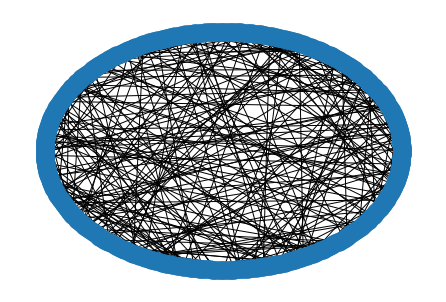

In [168]:
g = add_shortcuts(ring_network(500))
networkx.draw_circular(g)